In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from detect_ai_content.ml_logic.data import get_enriched_df

from sklearn import set_config; set_config(display='diagram')

import shap


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


torch.cuda.is_available:False


/Users/jeromemorissard/.pyenv/versions/3.10.6/envs/detect_ai_content/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise

device:mps
tf.config.experimental.list_physical_devices(GPU):[]


/Users/jeromemorissard/.pyenv/versions/3.10.6/envs/detect_ai_content/lib/python3.10/site-packages/mlflow/store/artifact/utils/models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


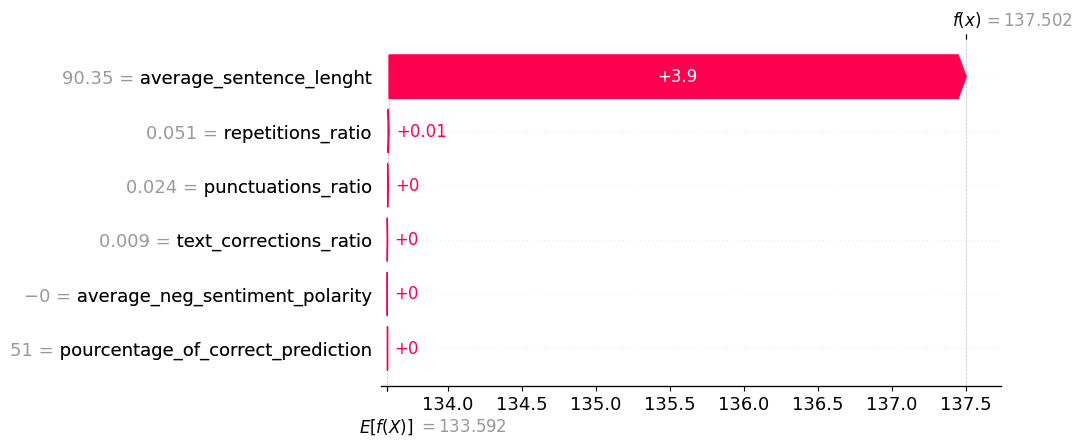

AssertionError: Feature and SHAP matrices must have the same number of rows!

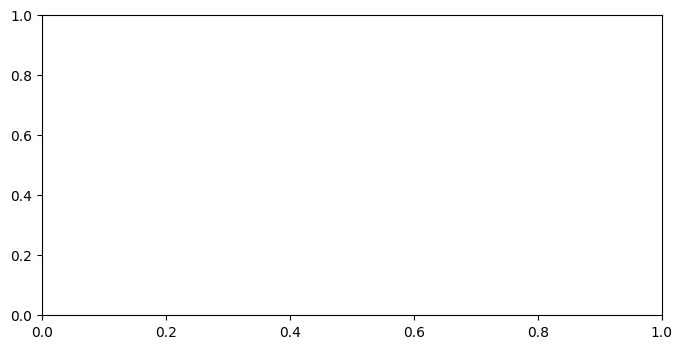

In [ ]:
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextLogisticRegression import TrueNetTextLogisticRegression
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextTfidfNaiveBayesClassifier import TrueNetTextTfidfNaiveBayesClassifier
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextSVC import TrueNetTextSVC

from detect_ai_content.ml_logic.preprocess import preprocess
shap.initjs()
df_train = get_enriched_df(purpose="train")

df = get_enriched_df(purpose="test")
y_test = df['generated']
X_test = df[[
        'repetitions_ratio',
        'punctuations_ratio',
        'text_corrections_ratio',
        'average_sentence_lenght',
        'average_neg_sentiment_polarity',
        'pourcentage_of_correct_prediction'
    ]]
X_train = df_train[[
        'repetitions_ratio',
        'punctuations_ratio',
        'text_corrections_ratio',
        'average_sentence_lenght',
        'average_neg_sentiment_polarity',
        'pourcentage_of_correct_prediction'
    ]]

model = TrueNetTextLogisticRegression()._load_model(stage="staging")

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])
shap.summary_plot(shap_values, X_train)

/Users/jeromemorissard/.pyenv/versions/3.10.6/envs/detect_ai_content/lib/python3.10/site-packages/mlflow/store/artifact/utils/models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10)
<class 'shap._explanation.Explanation'>


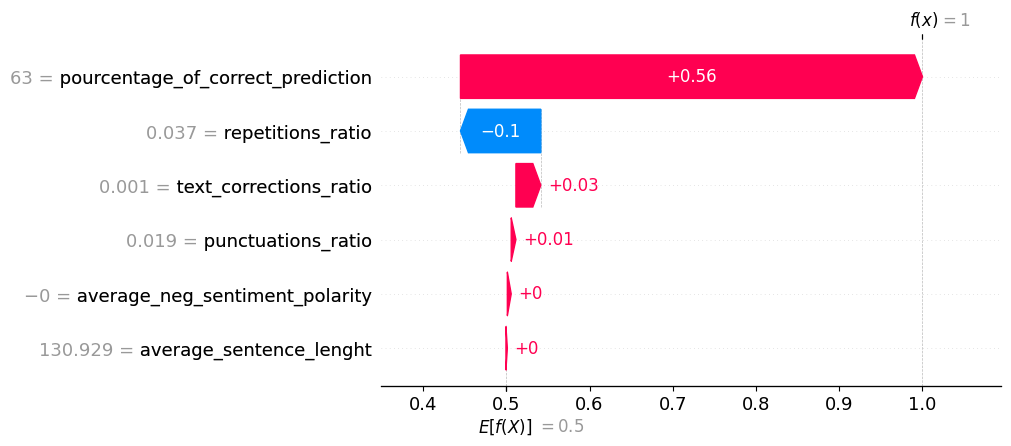

In [62]:
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextDecisionTreeClassifier import TrueNetTextDecisionTreeClassifier
from detect_ai_content.ml_logic.preprocess import preprocess
from shap import TreeExplainer
from shap import summary_plot

shap.initjs()
df_train = get_enriched_df(purpose="train")

df = get_enriched_df(purpose="test")
y_test = df['generated']
X_test = df[[
        'repetitions_ratio',
        'punctuations_ratio',
        'text_corrections_ratio',
        'average_sentence_lenght',
        'average_neg_sentiment_polarity',
        'pourcentage_of_correct_prediction'
    ]]
X_train = df_train[[
        'repetitions_ratio',
        'punctuations_ratio',
        'text_corrections_ratio',
        'average_sentence_lenght',
        'average_neg_sentiment_polarity',
        'pourcentage_of_correct_prediction'
    ]]

model = TrueNetTextDecisionTreeClassifier()._load_model(stage="staging")
print(model)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
# explainer = shap.Explainer(model, X_train)
X100 = shap.utils.sample(X_test, 100)

# X_train_kmeans = shap.kmeans(X_train, 10)
# X_train_sample = X_train.sample(10)

explainer = shap.TreeExplainer(model)
exp = explainer(X_train) # <-- here
print(type(exp))

id_to_explain = 1
output_to_explain = 1
shap.plots.waterfall(exp[id_to_explain,:,output_to_explain])

/Users/jeromemorissard/.pyenv/versions/3.10.6/envs/detect_ai_content/lib/python3.10/site-packages/mlflow/store/artifact/utils/models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


KNeighborsClassifier(n_neighbors=20)


100%|██████████| 346/346 [00:03<00:00, 111.90it/s]


TypeError: only integer scalar arrays can be converted to a scalar index

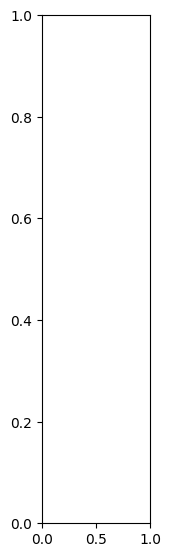

In [39]:
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextKNeighborsClassifier import TrueNetTextKNeighborsClassifier

from detect_ai_content.ml_logic.preprocess import preprocess
shap.initjs()
df_train = get_enriched_df(purpose="train")

df = get_enriched_df(purpose="test")
y_test = df['generated']
X_test = df[[
        'repetitions_ratio',
        'punctuations_ratio',
        'text_corrections_ratio',
        'average_sentence_lenght',
        'average_neg_sentiment_polarity',
        'pourcentage_of_correct_prediction'
    ]]
X_train = df_train[[
        'repetitions_ratio',
        'punctuations_ratio',
        'text_corrections_ratio',
        'average_sentence_lenght',
        'average_neg_sentiment_polarity',
        'pourcentage_of_correct_prediction'
    ]]

model = TrueNetTextKNeighborsClassifier()._load_model(stage="staging")
print(model)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
# explainer = shap.Explainer(model, X_train)

# X_train_kmeans = shap.kmeans(X_train, 10)
X_train_sample = X_train.sample(20)
explainer = shap.KernelExplainer(model.predict_proba, X_train_sample)

shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
# shap.plots.waterfall(shap_values[0])